In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

**Data Cleaning**

In [2]:
df = pd.read_csv('walmart.csv')

In [3]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df['Date'].count()

6435

In [5]:
df['Store'].nunique()

45

In [6]:
df['Holiday_Flag'].sum()

450

In [7]:
df.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.dropna()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [10]:
df.drop('Unemployment',axis = 1,inplace =True)

In [11]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143
...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854


In [12]:
df.rename(columns={'Date':'Week Start'} , inplace = True)

In [13]:
df.head()

,Store,Week Start,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143


In [14]:
df['Weekly_Sales'].sum()

6737218987.11

In [15]:
df['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

# Exploratory data analysis (EDA)

**Week Vs Sales**

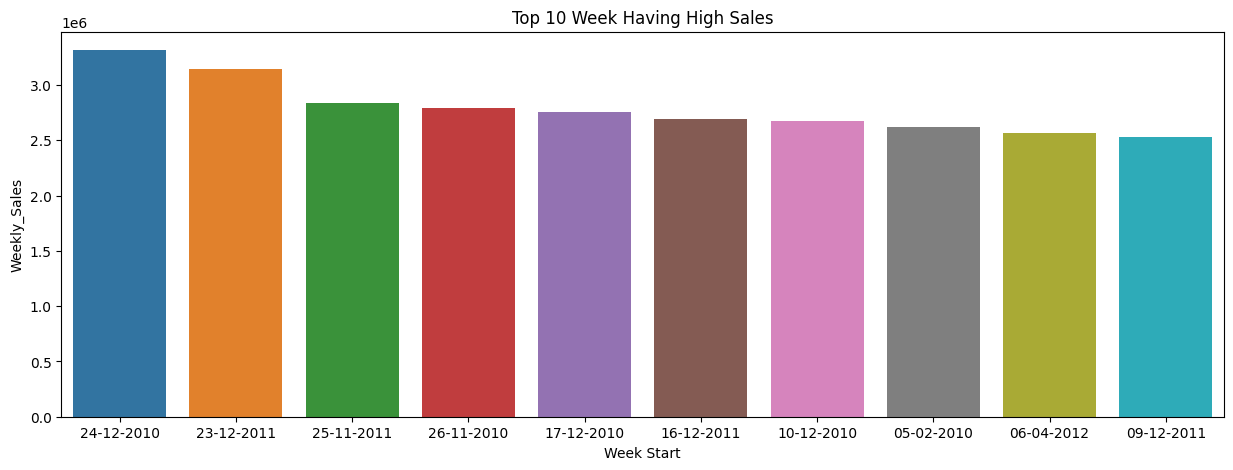

In [16]:
ax=plt.subplots(figsize=( 15, 5))
newdf = df.nlargest(50,'Weekly_Sales')
ax= sns.barplot(x= 'Week Start' , y = 'Weekly_Sales' ,data = newdf,errorbar=('ci',0))
plt.title('Top 10 Week Having High Sales')
plt.show()

**Sales Vs Temprature**

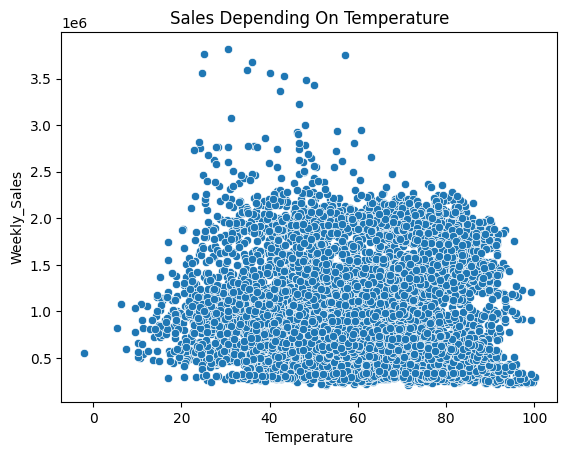

In [17]:
sns.scatterplot( x = 'Temperature', y = 'Weekly_Sales' , data = df)
plt.title('Sales Depending On Temperature')
plt.show()

**Holiday vs Sales**

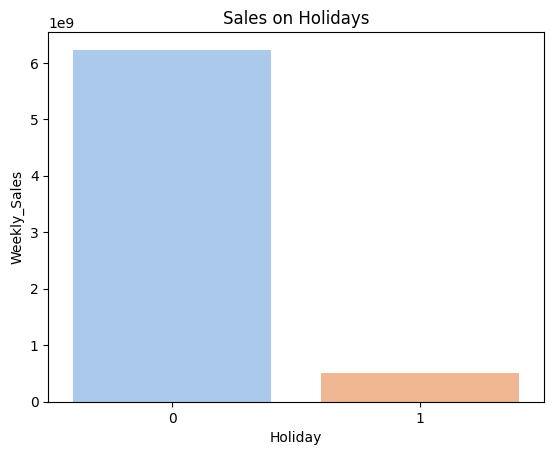

In [18]:
sns.barplot(x='Holiday_Flag' , y = 'Weekly_Sales',data = df,estimator = sum ,palette= 'pastel',errorbar = ('ci',0)) # 1 for Holiday
plt.title('Sales on Holidays')
plt.xlabel('Holiday')
plt.show()

**Sales Vs CPI**

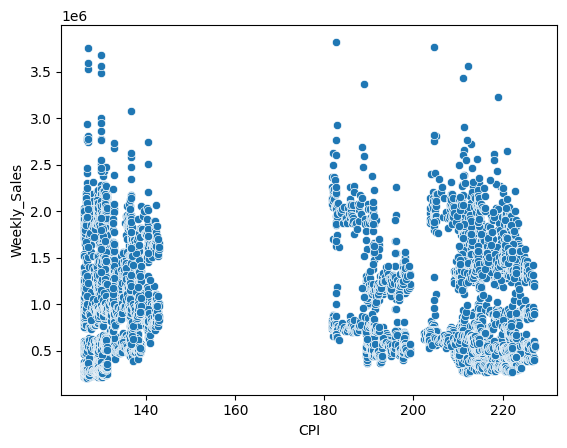

In [19]:
sns.scatterplot(x='CPI' , y= 'Weekly_Sales', data =df)
plt.show()

***Conclusion:***

*1. Week Starting From Dates '24-12-10' ,'23-12-11' and '25-12-11' has highest sales*

*2.Company has High sales in the Temperature Range 40'F to 80'F*

*3.Most Sales are on Non-Holidays*

*4.The Ratio Of Non-Holiday and Holiday is 93:7*

*People Spent Money When CPI reaches in the Ranges 'less than 140 ,180-200,200-220'*